In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the merged dataset
merged_df = pd.read_csv("merged_data.csv")

In [ ]:
## step 2 : Data pre-processing

In [2]:
# Check for missing values
print(merged_df.isnull().sum())

Date               0
Week_ID            3
Month Number       3
Month_ID           3
Year               3
Day_Name           3
Revenue            7
Marketing Spend    7
Promo              3
Visitors           8
dtype: int64


In [3]:
# Drop rows with missing values in specific columns
merged_df.dropna(subset=['Week_ID', 'Month Number', 'Month_ID', 'Year', 'Day_Name'], inplace=True)

# Replace missing values in numeric columns with the mean
merged_df['Revenue'].fillna(merged_df['Revenue'].mean(), inplace=True)
merged_df['Marketing Spend'].fillna(merged_df['Marketing Spend'].mean(), inplace=True)
merged_df['Visitors'].fillna(merged_df['Visitors'].mean(), inplace=True)

# Replace missing values in categorical column with mode
merged_df['Promo'].fillna(merged_df['Promo'].mode()[0], inplace=True)

# Verify if missing values have been handled
print(merged_df.isnull().sum())

Date               0
Week_ID            0
Month Number       0
Month_ID           0
Year               0
Day_Name           0
Revenue            0
Marketing Spend    0
Promo              0
Visitors           0
dtype: int64


In [4]:
# Encode categorical variables
merged_df = pd.get_dummies(merged_df, columns=['Promo'])

# Split the data into features (X) and target variable (y)
X = merged_df.drop(['Revenue', 'Date', 'Day_Name'], axis=1)
y = merged_df['Revenue']

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Train a Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

# Evaluate the model
linear_reg_pred = linear_reg.predict(X_test_scaled)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_pred))
print("Linear Regression RMSE:", linear_reg_rmse)

# Train a Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Evaluate the model
rf_reg_pred = rf_reg.predict(X_test_scaled)
rf_reg_rmse = np.sqrt(mean_squared_error(y_test, rf_reg_pred))
print("Random Forest Regression RMSE:", rf_reg_rmse)

Linear Regression RMSE: 2970.20550051317
Random Forest Regression RMSE: 2496.618955302855


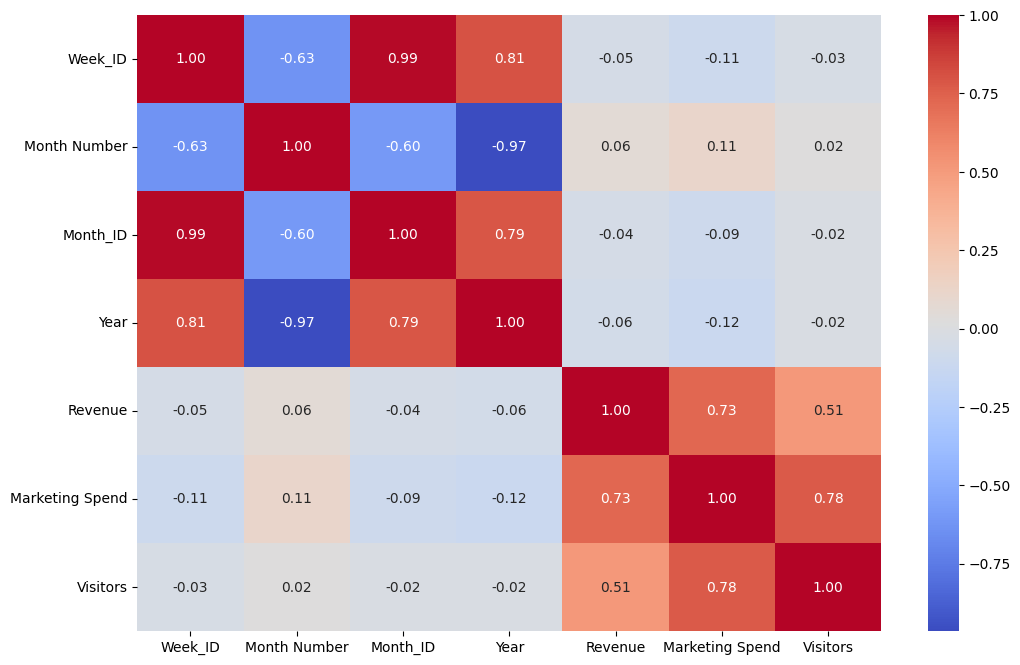

In [8]:
# Investigate the relationship between variables

# Select only numeric columns
numeric_df = merged_df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [12]:
# Identify the variable affecting Revenue the most
feature_importances = pd.Series(rf_reg.feature_importances_, index=X.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False)
print("Feature Importances:\n", feature_importances_sorted)

# Evaluate campaign success
campaign_revenue = merged_df.groupby(['Promo_No Promo', 'Promo_Promotion Blue', 'Promo_Promotion Red'])['Revenue'].sum().sort_values(ascending=False)
print("Campaign Revenue:\n", campaign_revenue)

## Based on the provided data, the campaign that utilized the "Promotion Blue" was the most successful in terms of revenue.
## It generated a total revenue of $876,514.27, which is the highest among the three types of campaigns. Why is that ?
## The feature importance analysis indicates that 'Marketing Spend' is the most influential factor, followed by the type of promotion. 
## This suggests that allocating sufficient marketing resources and running effective promotional campaigns are crucial for maximizing revenue generation. 
## Additionally, factors like the number of visitors, week ID, month ID, and other temporal features also contribute to campaign success but to a lesser extent 
## compared to marketing spend and promotion type.

Feature Importances:
 Marketing Spend         0.537943
Promo_No Promo          0.203532
Promo_Promotion Blue    0.116324
Visitors                0.078998
Week_ID                 0.027119
Month_ID                0.014898
Promo_Promotion Red     0.012565
Month Number            0.007598
Year                    0.001023
dtype: float64
Campaign Revenue:
 Promo_No Promo  Promo_Promotion Blue  Promo_Promotion Red
False           True                  False                  876514.269663
                False                 True                   586193.134831
True            False                 False                  443039.134831
Name: Revenue, dtype: float64


In [23]:
print(merged_df.columns)

Index(['Date', 'Week_ID', 'Month Number', 'Month_ID', 'Year', 'Day_Name',
       'Revenue', 'Marketing Spend', 'Visitors', 'Promo_No Promo',
       'Promo_Promotion Blue', 'Promo_Promotion Red'],
      dtype='object')


In [25]:
# Find the campaign with the highest revenue
highest_revenue_campaign = campaign_revenue.idxmax()

# Ensure that the constructed string matches one of the promotion columns
scenario2_data = merged_df[(merged_df['Promo_No Promo'] == 1) | 
                           (merged_df['Promo_Promotion Blue'] == 1) | 
                           (merged_df['Promo_Promotion Red'] == 1)].drop(['Revenue', 'Date', 'Day_Name'], axis=1)

scenario2_data_scaled = scaler.transform(scenario2_data)  # If needed, scale the features
scenario2_revenue = rf_reg.predict(scenario2_data_scaled)
print("Revenue for Scenario 2:", scenario2_revenue.sum())

Revenue for Scenario 2: 1910860.6621348318
